### Importando as bibliotecas utilizadas

In [241]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.image as mpimg
#converter as imagens para tons de cinza
#from skimage import color

## Testando Biblioteca

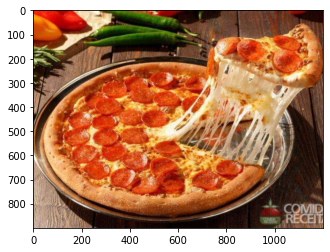

In [242]:
image = plt.imread('pizza')
plt.imshow(image)

### Tamanho da matriz

In [243]:
image.shape

(900, 1200, 3)

### Formato RGB

#### Deixando a imagem toda vermelha, zerando as camadas verde e azul

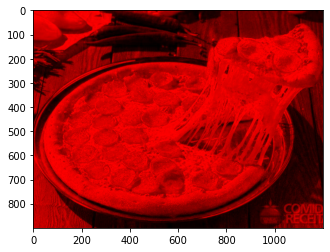

In [244]:
r = image.copy()
r[:,:,1] = 0
r[:,:,2] = 0
plt.imshow(r)

#### Deixando a imagem toda verde, zerando as camadas vermelho e azul

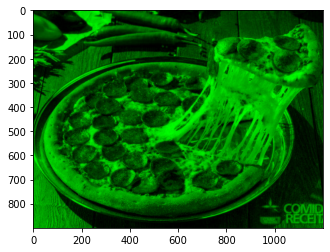

In [245]:
r = image.copy()
r[:,:,0] = 0
r[:,:,2] = 0
plt.imshow(r)

#### Deixando a imagem toda azul, zerando as camadas vermelho e verde

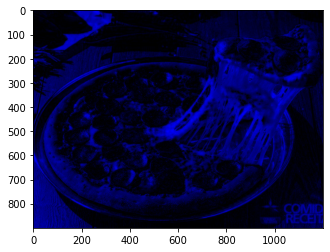

In [246]:
r = image.copy()
r[:,:,0] = 0
r[:,:,1] = 0
plt.imshow(r)

## Histograma

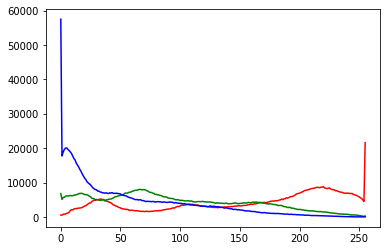

In [247]:
hr, bins = np.histogram(image[:,:,0], bins=256)
hg, bins = np.histogram(image[:,:,1], bins=256)
hb, bins = np.histogram(image[:,:,2], bins=256)

plt.plot(hr, color='r')
plt.plot(hg, color='g')
plt.plot(hb, color='b')

# Tarefa 1 - Comparação de imagens

### Código de comparação do histograma, fornecido pela Prof.Karin

In [248]:
def return_intersection(hist_1, hist_2):
    minima = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
    return intersection

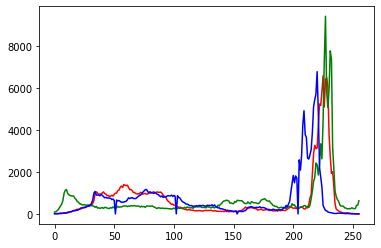

In [249]:
#Histograma do Hulk
image = plt.imread('./Base1/Hulk.png')
hr, bins = np.histogram(image[:,:,0], bins=256)
hg, bins = np.histogram(image[:,:,1], bins=256)
hb, bins = np.histogram(image[:,:,2], bins=256)

plt.plot(hr, color='r')
plt.plot(hg, color='g')
plt.plot(hb, color='b')

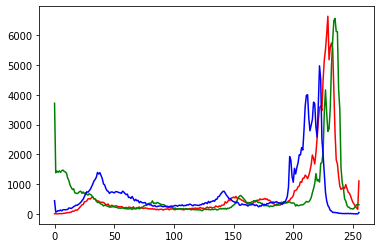

In [250]:
#Histograma da Mulher Maravilha
image = plt.imread('./Base1/Maravilha.png')
hr2, bins = np.histogram(image[:,:,0], bins=256)
hg2, bins = np.histogram(image[:,:,1], bins=256)
hb2, bins = np.histogram(image[:,:,2], bins=256)

plt.plot(hr2, color='r')
plt.plot(hg2, color='g')
plt.plot(hb2, color='b')

### Comparando - Exemplo

In [251]:
r = return_intersection(hr, hr2)
g = return_intersection(hg, hg2)
b = return_intersection(hb, hb2)

compatibilidade = r+g+b

#print(r, g, b)
#Resultado da soma dividido pelo maximo == porcentagem de acerto
print((compatibilidade / 3) * 100)

70.10873844506385


## Iniciando o treinamento do algoritmo

### Funções utilizadas para o cálculo de comparação e plotagem dos histogramas
#### Lembrando que também é utilizada a função fornecida pela Prof.Karin (declarada anteriormente).

In [278]:
def show_img(caminho_img):
    image = plt.imread(caminho_img)
    plt.imshow(image)
    
#Ler a imagem dado o caminho e retorn o histograma referente a cada cor
def get_histograma(caminho_imagem):
    image = plt.imread(caminho_imagem)
    hr, bins = np.histogram(image[:,:,0], bins=256)
    hg, bins = np.histogram(image[:,:,1], bins=256)
    hb, bins = np.histogram(image[:,:,2], bins=256)
    
    return hr, hg, hb

#Plota o grafico do histograma dado os valores do mesmo
def plot_histograma(hr, hg, hb):
    plt.plot(hr, color='r')
    plt.plot(hg, color='g')
    plt.plot(hb, color='b')


    
def calc_percent(valor):
    return (valor / 3) * 100

#Captura o histograma de cada imagem, comparar e retorna o grau de compatibilidade convertido em porcentagem
def calc_histograma(imagem1, imagem2):
    hr1, hg1, hb1 = get_histograma(imagem1)
    hr2, hg2, hb2 = get_histograma(imagem2)
    
    r = return_intersection(hr1, hr2)
    g = return_intersection(hg1, hg2)
    b = return_intersection(hb1, hb2)
    
    compatibilidade = r+g+b
    #compatibilidade = calc_percent(compatibilidade)
    #compatibilidade = round(compatibilidade)
    return compatibilidade


def show_grafico(dic_dados, chave_eh_valor = False, color="red"):
    eixo_x = ""
    eixo_y = ""
    
    if(chave_eh_valor):
        eixo_x = list(dic_dados.keys())
        eixo_y = list(dic_dados.values())
    else:
        eixo_x = list(dic_dados.values())
        eixo_y = list(dic_dados.keys())

    plt.barh(eixo_y, eixo_x, 0.5, color=color)
    
    #Mostrar valores ao lado das barras
    for i, v in enumerate(eixo_x):
        plt.text(v, i , str(v), color='blue')
        
    plt.show()

    
#Recebe uma lista de modelos e uma lista de testes
#Mostra na tela o nome da imagem a ser testada e a porcentagem de acerto referente a cada modelo
def executa_testes(list_modelos, list_testes):
    for img_teste in list_testes:
        resultado = {}
        for img_base in list_modelos:
            quem_eh = calc_histograma(img_teste, img_base)
            resultado[img_base] = round(quem_eh, 2)

        print(img_teste)
        #show_img_gray(img_teste)
        #print(resultado)
        show_grafico(resultado)
    
#Retorna uma lista concatenando o nome do diretorio + nome da imagem
def concat_dir(diretorio, lista_imgs):
    return [diretorio + image for image in lista_imgs]
    

### Diretorio e caminho das imagens

In [253]:
diretorio_base1 = './Base1/'
diretorio_base2 = './Base2/'
modelos_img = ['America.png', 'Batman.png', 'Ferro.png', 'Flash.png', 
           'Hulk.png', 'Maravilha.png', 'super.png', 'wolverine.png']
modelos_img = concat_dir(diretorio_base1, modelos_img)

teste1_img = ['QUEM1.png', 'QUEM2.png', 'QUEM3.png', 'QUEM4.png', 'QUEM5.png']
teste1_img = concat_dir(diretorio_base1, teste1_img)

teste2_img = ['quem6.png', 'quem7.png', 'quem8.png', 'quem9.png', 'quem10.png', 
              'quem11.png', 'quem12.png', 'quem13.png', 'quem14.png', 'quem15.png', 'quem16.png']
teste2_img = concat_dir(diretorio_base2, teste2_img)


## 1ª e 2ª parte da Tarefa
### Utilizando a 1ª base de testes

./Base1/QUEM1.png


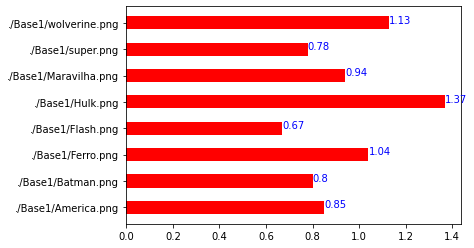

./Base1/QUEM2.png


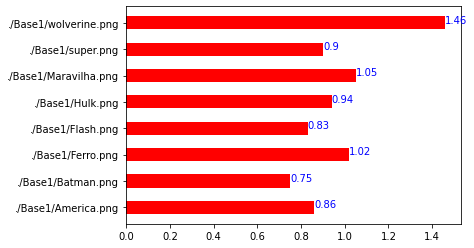

./Base1/QUEM3.png


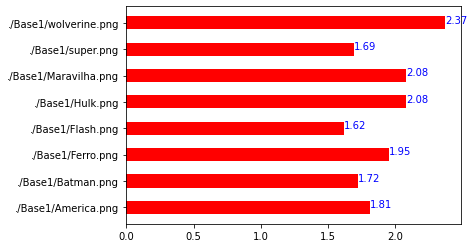

./Base1/QUEM4.png


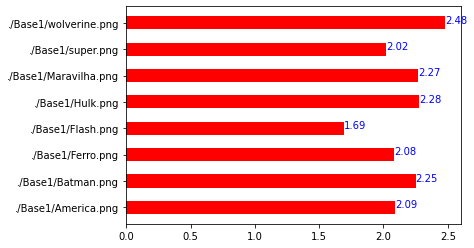

./Base1/QUEM5.png


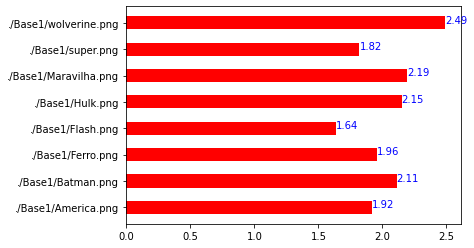

In [279]:
executa_testes(modelos_img, teste1_img)
#executa_testes(modelos_img, modelos_img)

## 3ª Parte da Tarefa
### Utilizando a 2ª base de testes

./Base2/quem6.png


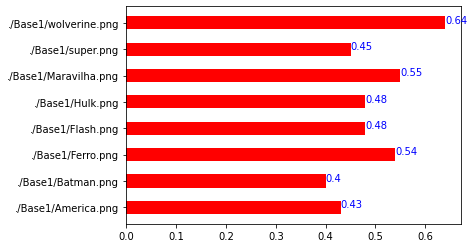

./Base2/quem7.png


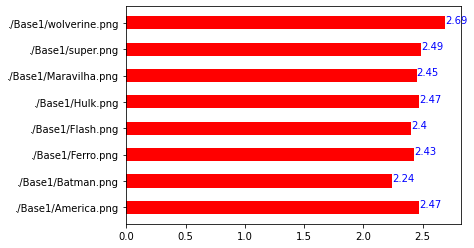

./Base2/quem8.png


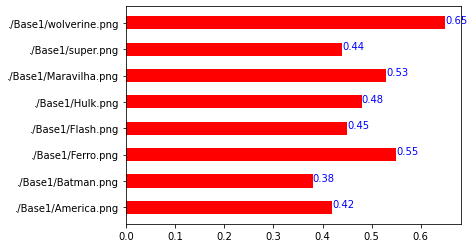

./Base2/quem9.png


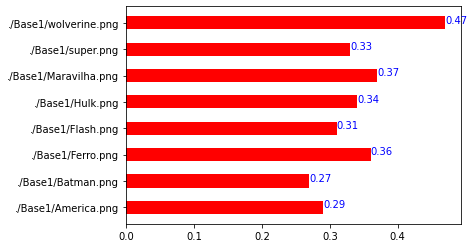

./Base2/quem10.png


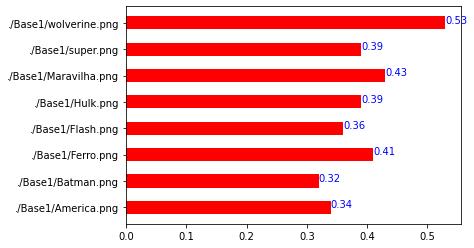

./Base2/quem11.png


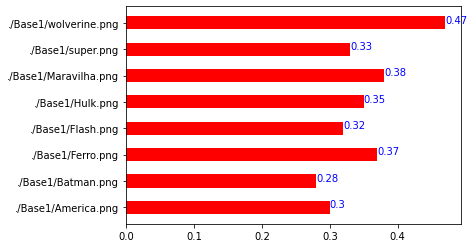

./Base2/quem12.png


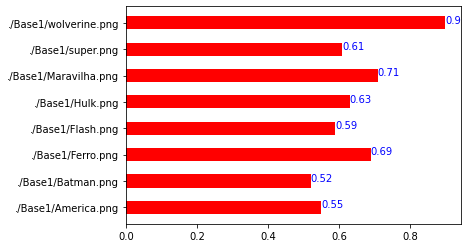

./Base2/quem13.png


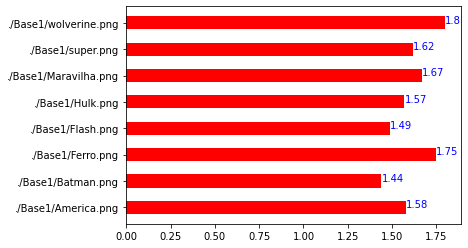

./Base2/quem14.png


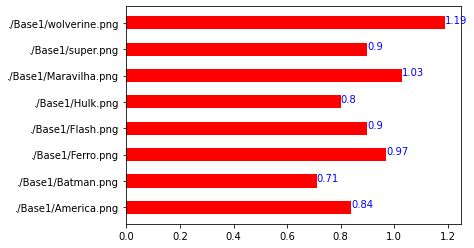

./Base2/quem15.png


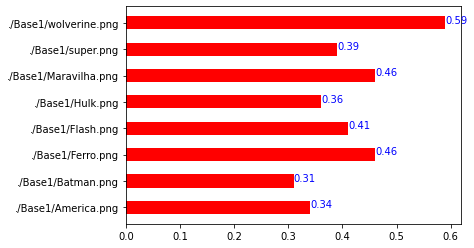

./Base2/quem16.png


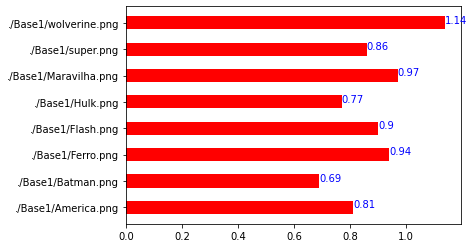

In [280]:
executa_testes(modelos_img, teste2_img)

## Utilizando outras formas de comparação

### Salvando os histogramas de cada imagem modelo num dicionario

In [256]:
#Importando as novas bibliotecas necessarias
from scipy.spatial import distance as dist
#pip3 install scikit-build (Necessario para a instalacao do opencv)
#sudo pip3 install --upgrade pip (Necessario upgrade do pip por conta do cmake)
#pip3 install opencv-python
import cv2

#index para os histogramas extraidos
dic_hist_modelos = {}
#dic_images = {}

for img in modelos_img:
    image = cv2.imread(img)
    #Calculo do histograma
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    
    #Normalizando histograma
    hist = cv2.normalize(hist, hist).flatten()
    
    #Armazenando no dicionario
    dic_hist_modelos[img] = hist

#print(dic_images)

### Inicializando diretorio de toda base de teste "QUEM"

In [257]:
diretorio_all_quem = "./BaseQuem/"
teste_images = ['QUEM1.png', 'QUEM2.png', 'QUEM3.png', 'QUEM4.png', 'QUEM5.png',
                'quem6.png', 'quem7.png', 'quem8.png', 'quem9.png', 'quem10.png', 
                'quem11.png', 'quem12.png', 'quem13.png', 'quem14.png', 'quem15.png', 'quem16.png']

teste_images = concat_dir(diretorio_all_quem, teste_images)

### Salvando histogramas de todas base de teste "QUEM"

In [258]:
#index para os histogramas extraidos
dic_hist_quem = {}
#dic_images = {}

for img in teste_images:
    image = cv2.imread(img)
    #Calculo do histograma
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    
    #Normalizando histograma
    hist = cv2.normalize(hist, hist).flatten()
    
    #Armazenando no dicionario
    dic_hist_quem[img] = hist

#print(dic_hist_quem)

### Usando Funções do OpenCV (cv2.compareHist)

#### Funções para calculo de compatibilidade (Por cada método ter um range de resultados diferentes)

In [259]:
'''
Para algunas funcoes de similaridade, um valor GRANDE significa maior similaridade (Correlation & Intersection).
E para outros, um valor PEQUENO indica maior similaridade (Chi-Squared & Hellinger).
'''
#min...max (menor compatibilidade...maior compatibilidade)
#Intersection
#0...3
def calc_percent_intersec(valor):
    return (valor/3) * 100

#Chi-Squared
#100...0
#Normalizar
'''
def calc_percent_chisquar(valor):
    return 100-valor
'''
def calc_percent_chisquar(dic_results):
    min_value = min(dic_results.values())
    max_value = max(dic_results.values())
    new_dic = {}
    
    #Normalizando os valores
    for key in dic_results:
        new_dic[key] = (dic_results[key] - min_value) / (max_value - min_value)
    
    #Em seguida, eh aplicado o mesmo calculo da porcentagem de Hellinger
    for key in new_dic:
        #print(key)
        new_dic[key] = calc_percent_hellinger(new_dic[key])
        #print(new_dic[key])
    #print(new_dic)
    return new_dic

#Correlation
#0...1
def calc_percent_correlation(valor):
    return valor * 100

#Hellinger
#1...0
def calc_percent_hellinger(valor):
    return (1-valor) * 100

#### Função para mostrar em ordem os resultados

In [260]:
def show_result_ordenado(dic_dados, crescente):
    eixo_y = list(dic_dados.values())
    eixo_x = list(dic_dados.keys())
    
    if crescente:
        eixo_x.sort()
    else:
        eixo_x.sort(reverse=True)
        
    for chave in eixo_x:
        print("Resultado: %f -> %s" %(chave, dic_dados[chave]))

#### Definição de um gabarito para avaliar a precisão dos métodos


In [306]:
diretorio_base_quem = './BaseQuem/'
diretorio_base_modelo = './Base1/'
gabarito_quem_aux = {
    "QUEM1.png": "Hulk.png", "QUEM2.png": "wolverine.png", "QUEM3.png": "Ferro.png", "QUEM4.png": "Batman.png", 
    "QUEM5.png": "Maravilha.png", "quem6.png": "Ferro.png", "quem7.png": "Maravilha.png", 
    "quem8.png": "Batman.png", "quem9.png": "Batman.png", "quem10.png": "America.png",
    "quem11.png": "Batman.png", "quem12.png": "Maravilha.png", "quem13.png": "Maravilha.png", 
    "quem14.png": "Flash.png", "quem15.png": "Flash.png", "quem16.png": "Flash.png"
}

gabarito_quem = {}

for chave in gabarito_quem_aux.keys():
    gabarito_quem[diretorio_base_quem + chave] = diretorio_base_modelo + gabarito_quem_aux[chave]


#### Função para verificar se determinado método acertou ou não

In [314]:
#Dependendo do tipo de metodo, o MENOR e MAIOR valor tem significados distintos
#Retorna se o o extremo benevolente do algoritmo diz respeito a imagem do gabarito
#Ou seja, se o maior (ou o menor) valor dele, eh de acordo com a imagem que deveria ser
def verifica_acerto(img_verificada, results, gabarito, menor_eh_acerto = False):
    acertou = False
    if(menor_eh_acerto):
        #Menor valor == maior precisao
        maior_prob = min(results.keys())

        #Verifico se a melhor resposta do metodo eh igual ao gabarito da img testada
        melhor_resposta_metodo = results[maior_prob]

        #Verificamos se eh igual ao gabarito
        if(melhor_resposta_metodo == gabarito[img_verificada]):
            #Se sim, informo que acertou
            acertou = True

        #show_result_ordenado(results, True) 

    else:
        #Maior valor == maior precisao
        maior_prob = max(results.keys())

        #Verifico se a melhor resposta do metodo eh igual ao gabarito da img testada
        melhor_resposta_metodo = results[maior_prob]

        #Verificamos se eh igual ao gabarito
        if(melhor_resposta_metodo == gabarito[img_verificada]):
            #Se sim, informo que acertou
            acertou = True

        #show_result_ordenado(results, False) 
    return acertou

#### Criando a função para a excução da 3ª e 4ª parte da tarefa

In [321]:
#Dicionario para os metodos de comparacao dos histogramas
opencv_methods = {
    ("Correlation", cv2.HISTCMP_CORREL),
    ("Intersection", cv2.HISTCMP_INTERSECT),
    ("Hellinger", cv2.HISTCMP_BHATTACHARYYA),
    ("Chi-Squared", cv2.HISTCMP_CHISQR)
}

def calc_opencv_methods(dic_hist_teste, dic_hist_modelos):
    #Para avaliar a precisao dos metodos
    dic_acertos_metodos = {"Correlation": 0, "Intersection": 0, "Hellinger": 0, "Chi-Squared": 0}

    #Loop sobre o dic_hist_modelos(Onde possui os resultados dos histogramas)
    for (img_teste, hist_teste) in dic_hist_teste.items():
        print("----------  %s ----------" %img_teste)
        for(nome_metodo, funcao_metodo) in opencv_methods:
            #Reinicia o dicionario de resultados
            results = {}
            for(img_modelo, hist_modelo) in dic_hist_modelos.items():
                d = cv2.compareHist(hist_teste, hist_modelo, funcao_metodo)
                d = round(d, 2)
                
                #Chave se torna o resultado e o valor o modelo deste resultado
                results[d] = img_modelo

            #Mostrando os resultados e calculando acertos
            print(nome_metodo)
            
            #Reinicio a variavel de acerto
            acertou_imagem = False
            #Verifico se a melhor resposta do metodo eh igual ao gabarito da img testada
            if(nome_metodo == "Hellinger" or nome_metodo == "Chi-Squared"):
                print("----------MENOR VALOR == MAIOR PRECISAO----------")
                #Informo que o menor valor diz respeito a maior precisao
                acertou_imagem = verifica_acerto(img_teste, results, gabarito_quem, True)
            else:
                acertou_imagem = verifica_acerto(img_teste, results, gabarito_quem)
            
            #Se sim, acrescenta em um o acerto do respectivo metodo
            if(acertou_imagem):
                dic_acertos_metodos[nome_metodo] += 1
            
            #Informo que a chave do dic eh o valor do eixo X
            show_grafico(results, True)
            
    print("Acertos dos metodos")
    show_grafico(dic_acertos_metodos, color="blue")

#### Execução dos métodos do OpenCV

----------  ./BaseQuem/QUEM1.png ----------
Intersection


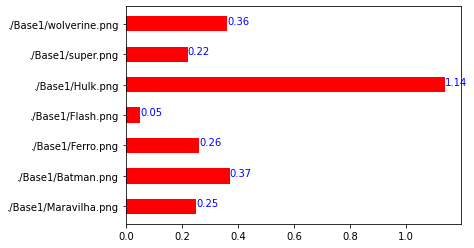

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


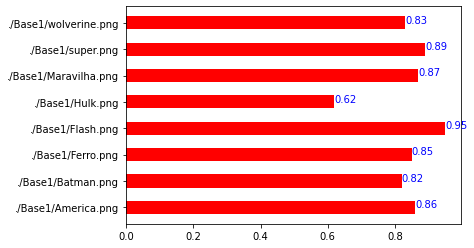

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


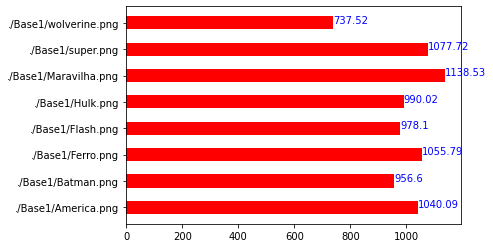

Correlation


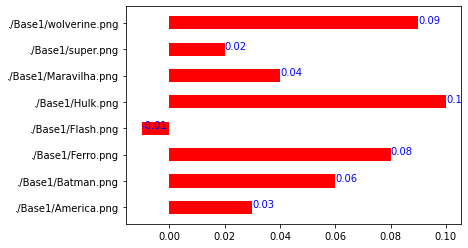

----------  ./BaseQuem/QUEM2.png ----------
Intersection


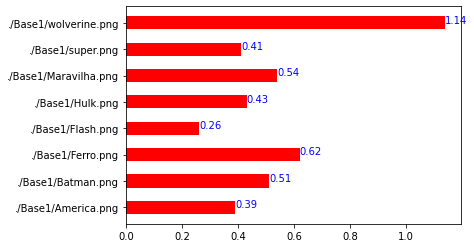

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


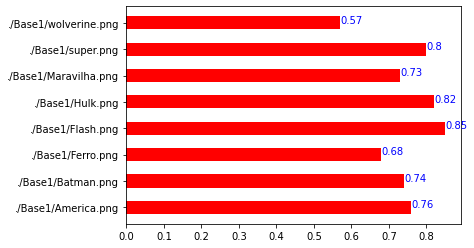

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


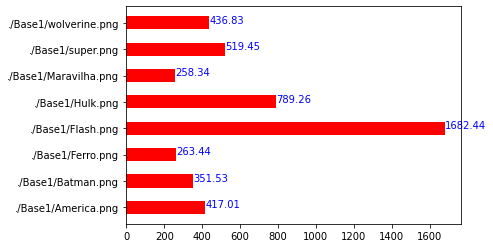

Correlation


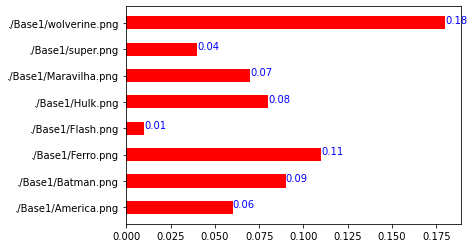

----------  ./BaseQuem/QUEM3.png ----------
Intersection


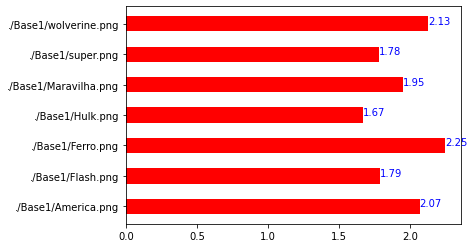

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


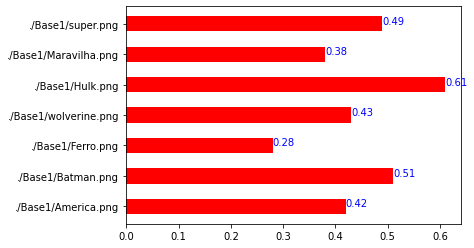

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


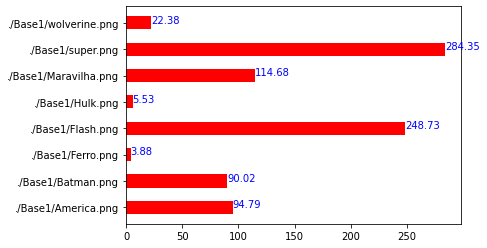

Correlation


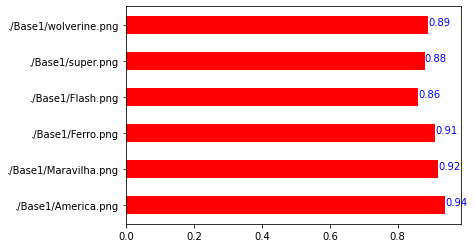

----------  ./BaseQuem/QUEM4.png ----------
Intersection


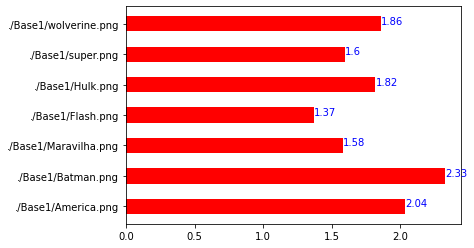

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


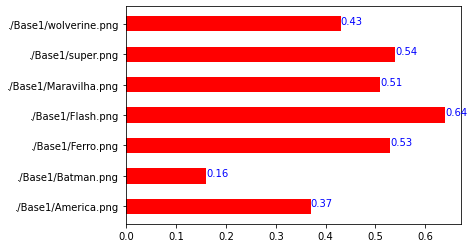

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


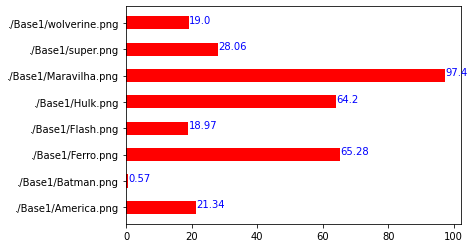

Correlation


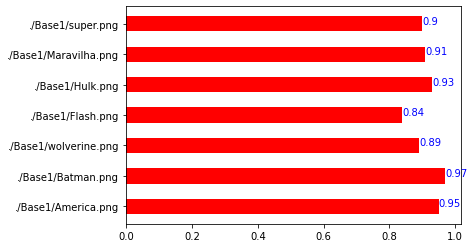

----------  ./BaseQuem/QUEM5.png ----------
Intersection


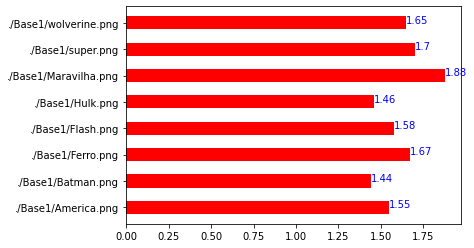

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


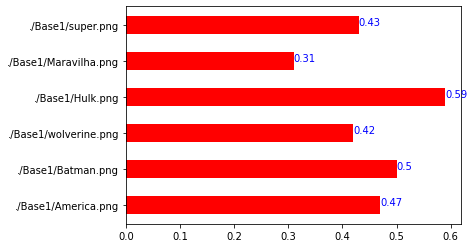

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


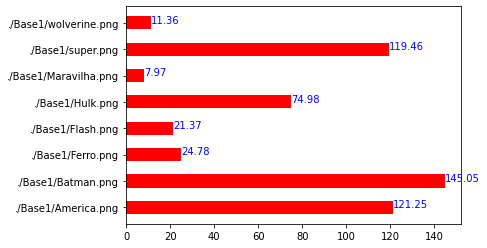

Correlation


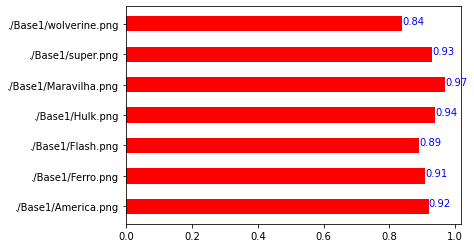

----------  ./BaseQuem/quem6.png ----------
Intersection


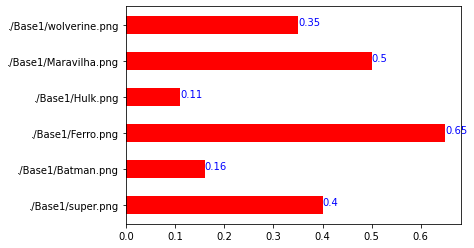

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


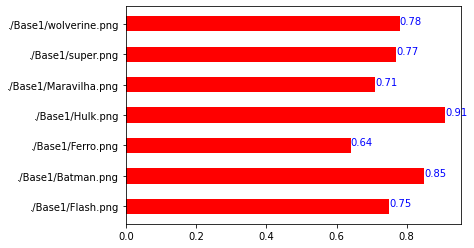

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


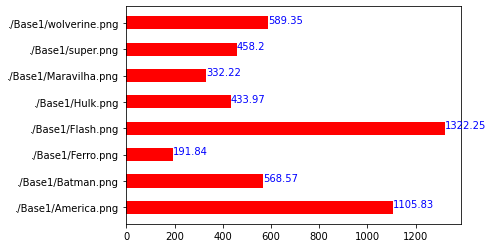

Correlation


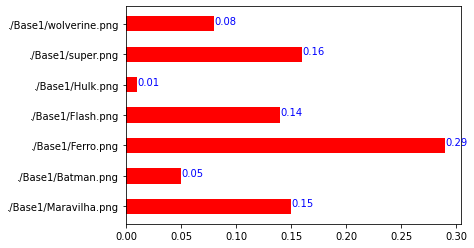

----------  ./BaseQuem/quem7.png ----------
Intersection


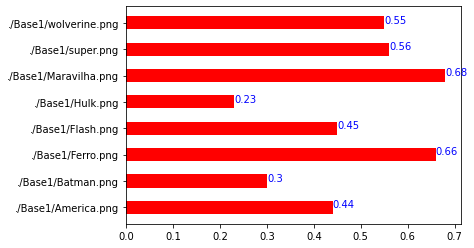

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


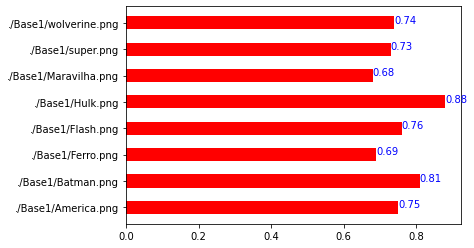

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


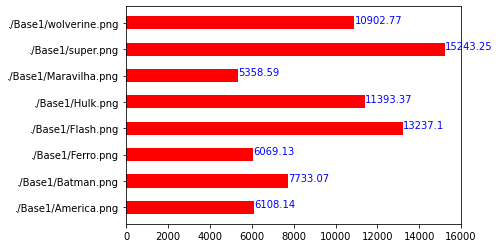

Correlation


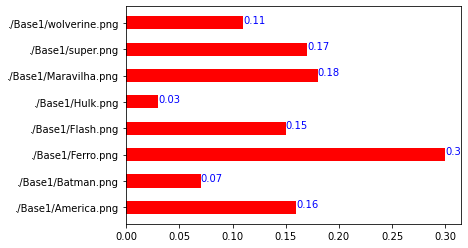

----------  ./BaseQuem/quem8.png ----------
Intersection


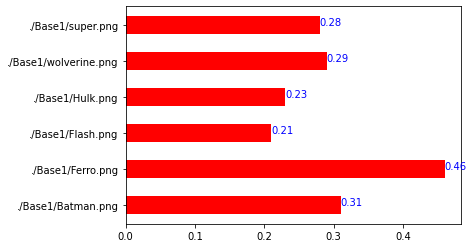

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


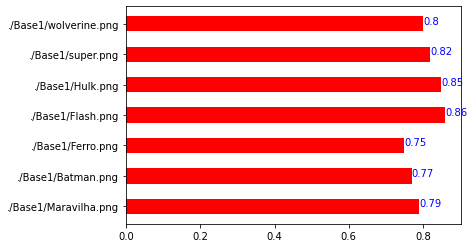

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


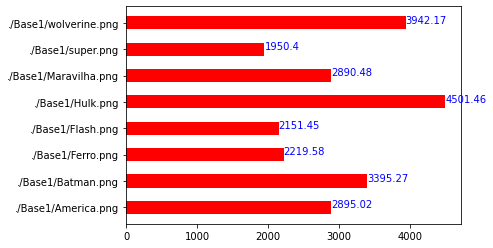

Correlation


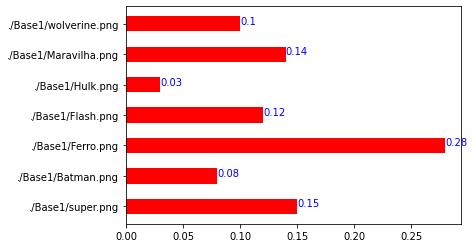

----------  ./BaseQuem/quem9.png ----------
Intersection


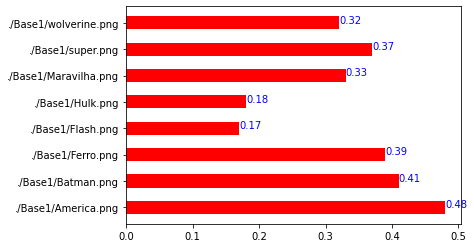

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


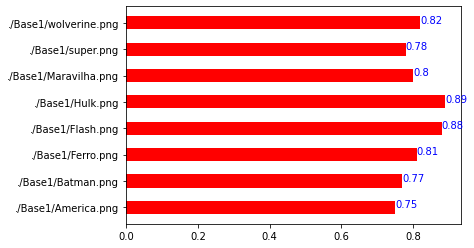

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


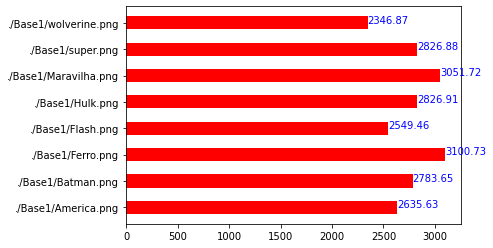

Correlation


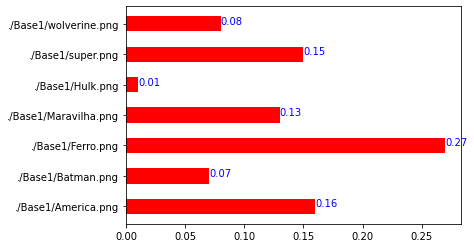

----------  ./BaseQuem/quem10.png ----------
Intersection


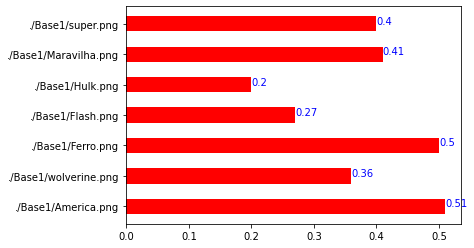

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


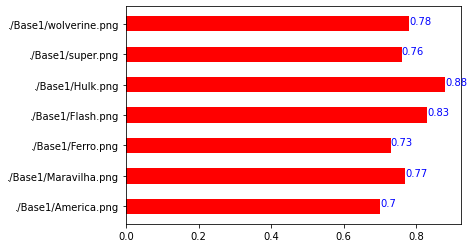

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


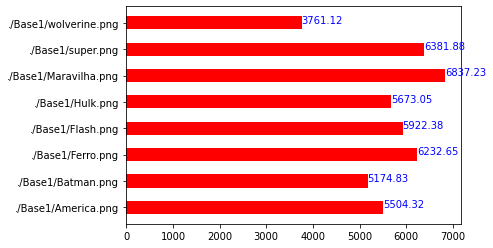

Correlation


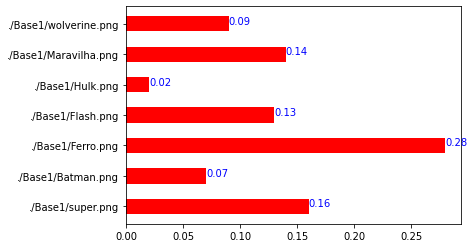

----------  ./BaseQuem/quem11.png ----------
Intersection


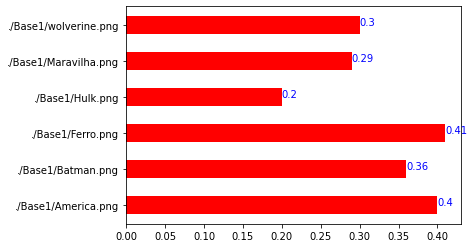

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


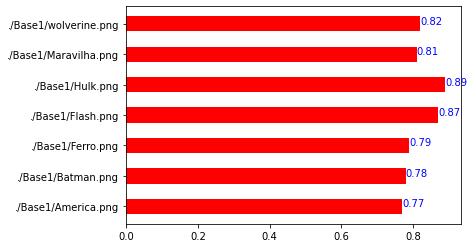

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


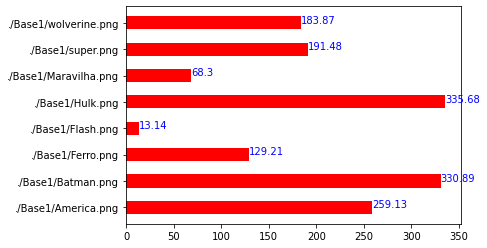

Correlation


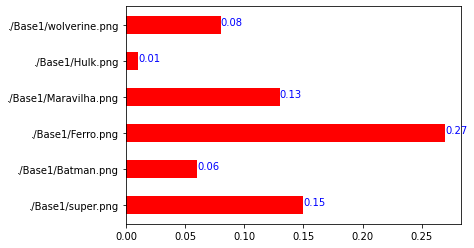

----------  ./BaseQuem/quem12.png ----------
Intersection


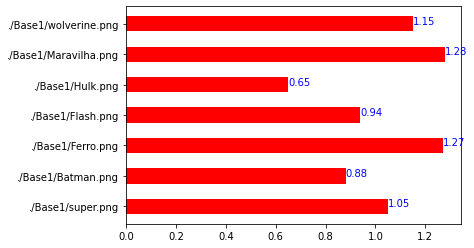

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


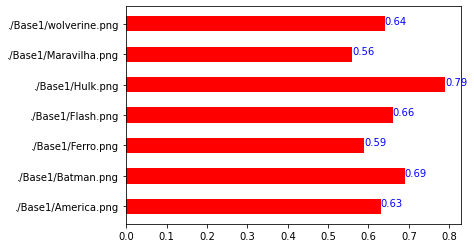

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


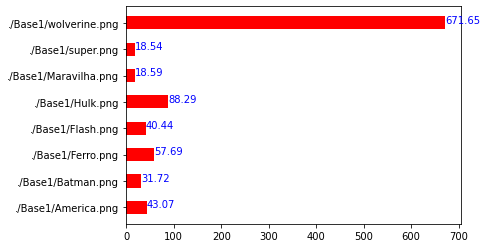

Correlation


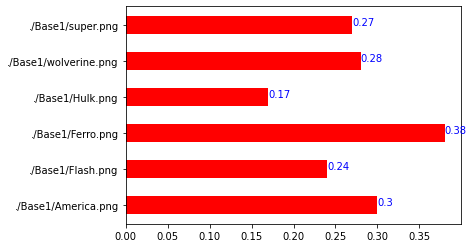

----------  ./BaseQuem/quem13.png ----------
Intersection


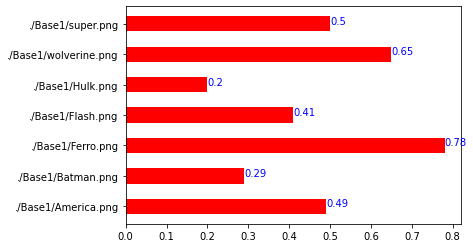

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


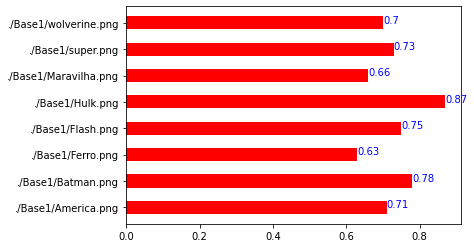

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


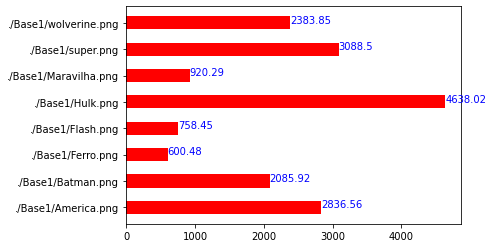

Correlation


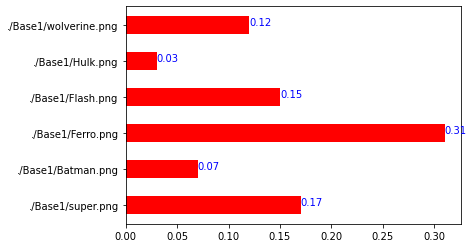

----------  ./BaseQuem/quem14.png ----------
Intersection


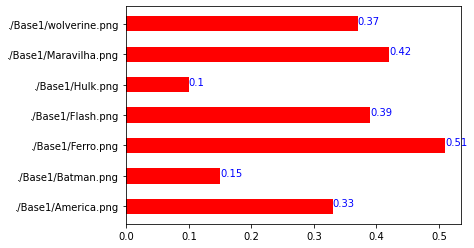

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


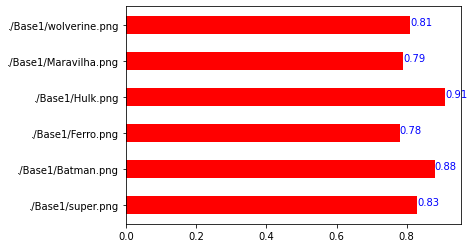

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


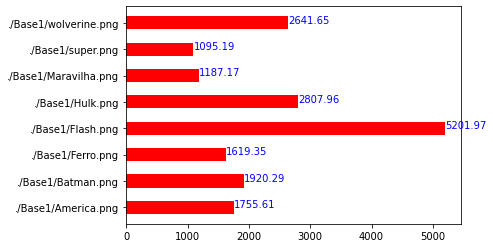

Correlation


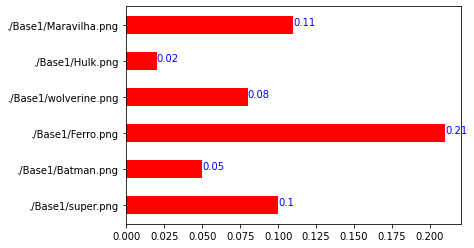

----------  ./BaseQuem/quem15.png ----------
Intersection


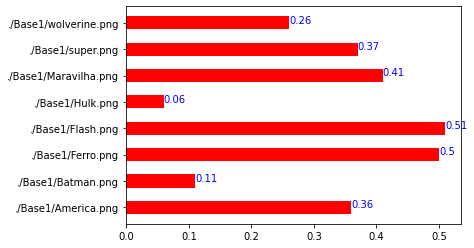

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


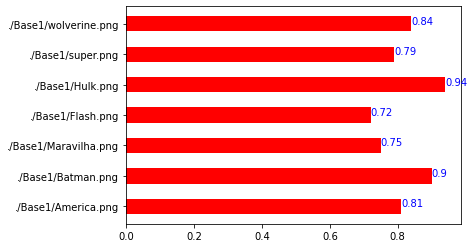

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


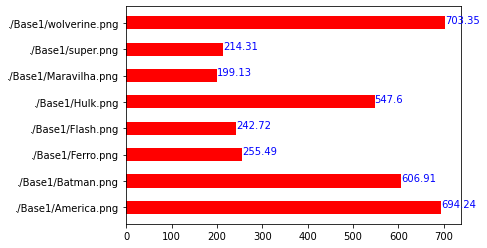

Correlation


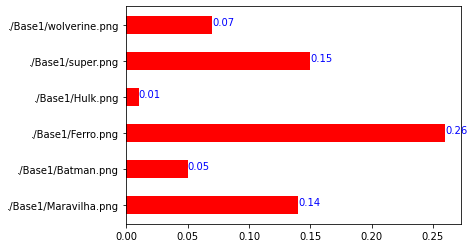

----------  ./BaseQuem/quem16.png ----------
Intersection


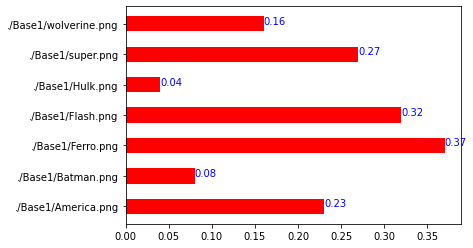

Hellinger
----------MENOR VALOR == MAIOR PRECISAO----------


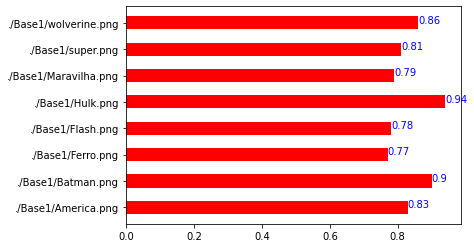

Chi-Squared
----------MENOR VALOR == MAIOR PRECISAO----------


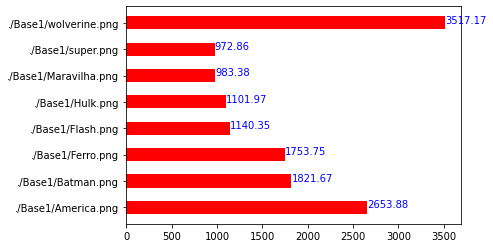

Correlation


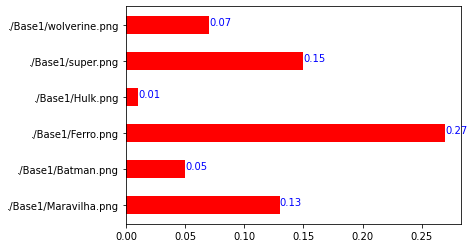

Acertos dos metodos


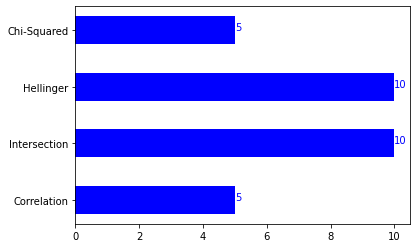

In [322]:
calc_opencv_methods(dic_hist_quem, dic_hist_modelos)

### Utilizando métricas de distância SciPy

#### Crianda a função para a excução da 3ª e 4ª parte da tarefa

In [323]:
#De forma analoga aos metodos do OpenCV, iniciamos um dicionario com o nome e o metodo scipy
scipy_methods = {
    ("Euclidean", dist.euclidean),
    ("Manhattan", dist.cityblock),
    ("Chebysev", dist.chebyshev)
}

#Calcula com base nos metodos de scip
def calc_scipy_metrics(dic_hist_teste, dic_hist_modelos):
    dic_acertos_metodos = {
        "Euclidean": 0, "Manhattan": 0, "Chebysev": 0
    }
    #Loop sobre o dic_hist_modelos(Onde possui os resultados dos histogramas)
    for (img_teste, hist_teste) in dic_hist_teste.items():
        print("----------  %s ----------" %img_teste)
        #Loop sobre os metodos do scipy
        for(nome_metodo, funcao_metodo) in scipy_methods:
            #Reinicia o dicionario de resultados
            results = {}
            for(img_modelo, hist_modelo) in dic_hist_modelos.items():

                d = funcao_metodo(hist_teste, hist_modelo)
                
                #Chave se torna o resultado e o valor o modelo deste resultado
                results[d] = img_modelo

            #Mostrando os resultados e calculando acertos
            acertou_imagem = False
            acertou_imagem = verifica_acerto(img_teste, results, gabarito_quem)
            if(acertou_imagem):
                dic_acertos_metodos[nome_metodo] += 1
                
            '''
            #O menor valor diz respeito ao mais provavel de acerto
            maior_prob = min(results.keys())
            
            #O valor eh a chave de qual imagem pressupoe ser
            melhor_resposta_metodo = results[maior_prob]
            
            #Verificamos se eh igual ao gabarito
            #Se sim, acrescenta em um o acerto do respectivo metodo
            if(melhor_resposta_metodo == gabarito_quem[img_teste]):
                dic_acertos_metodos[nome_metodo] += 1

            show_result_ordenado(results, True)
            print("\n")
            '''

    #print(dic_acertos_metodos)
    print("Quantidade de acerto dos metodos")
    show_grafico(dic_acertos_metodos, color="purple")


----------  ./BaseQuem/QUEM1.png ----------
Resultado: 2.851426 -> ./Base1/Hulk.png
Resultado: 4.102726 -> ./Base1/Batman.png
Resultado: 4.462456 -> ./Base1/Maravilha.png
Resultado: 4.609971 -> ./Base1/America.png
Resultado: 4.693632 -> ./Base1/super.png
Resultado: 4.694867 -> ./Base1/Ferro.png
Resultado: 4.801382 -> ./Base1/Flash.png
Resultado: 4.826488 -> ./Base1/wolverine.png


Resultado: 0.899051 -> ./Base1/Ferro.png
Resultado: 0.915162 -> ./Base1/wolverine.png
Resultado: 0.933014 -> ./Base1/Batman.png
Resultado: 0.933440 -> ./Base1/Maravilha.png
Resultado: 0.936209 -> ./Base1/Hulk.png
Resultado: 0.944054 -> ./Base1/America.png
Resultado: 0.957280 -> ./Base1/super.png
Resultado: 0.968601 -> ./Base1/Flash.png


Resultado: 1.333941 -> ./Base1/Hulk.png
Resultado: 1.339680 -> ./Base1/wolverine.png
Resultado: 1.350674 -> ./Base1/Ferro.png
Resultado: 1.364888 -> ./Base1/Batman.png
Resultado: 1.377886 -> ./Base1/Maravilha.png
Resultado: 1.382023 -> ./Base1/America.png
Resultado: 1.394356 

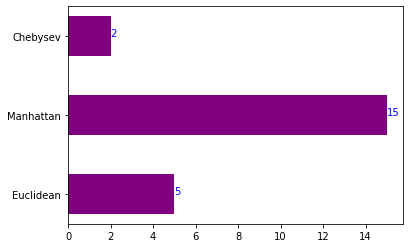

In [324]:
calc_scipy_metrics(dic_hist_quem, dic_hist_modelos)